# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [4]:
# Write your code here
!pip install BERTopic
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from bertopic import BERTopic

# Load the dataset
data = pd.read_csv('movie_reviews_cleaned.csv')

# Preprocess the text data (tokenization, removing stopwords, stemming/lemmatization)

# Drop rows with missing values in the 'Cleaned Text' column
data = data.dropna(subset=['Cleaned Text'])

# Refit the vectorizer
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(data['Cleaned Text'])

# Define the number of topics
num_topics = 10

# Apply Latent Dirichlet Allocation (LDA)
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

# Print the top 10 clusters (topics) for LDA
print("Top 10 clusters for LDA:")
for index, topic in enumerate(lda_model.components_):
    print(f"Cluster {index+1}:")
    top_words_idx = topic.argsort()[-10:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(top_words)
    print()

# Apply Latent Semantic Analysis (LSA)
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_model.fit(dtm)

# Print the top 10 clusters (topics) for LSA
print("Top 10 clusters for LSA:")
for index, topic in enumerate(lsa_model.components_):
    print(f"Cluster {index+1}:")
    top_words_idx = topic.argsort()[-10:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(top_words)
    print()

# Apply BERTopic
bertopic_model = BERTopic(language="english")
topics, _ = bertopic_model.fit_transform(data['Cleaned Text'])

# Print the top 10 clusters (topics) for BERTopic
print("Top 10 clusters for BERTopic:")
for topic_id in range(num_topics):
    topic_words = bertopic_model.get_topic(topic_id)
    print(f"Cluster {topic_id+1}:")
    print(topic_words)
    print()


Top 10 clusters for LDA:
Cluster 1:
['seasoned', 'react', 'trimmed', 'explosions', 'special', 'year', 'shoot', 'cgi', 'imax', 'format']

Cluster 2:
['isn', 'monster', 'wether', 'nolans', 'sticks', 'good', 'happened', 'movie', 'doesn', 'story']

Cluster 3:
['worthy', 'best', 'downey', 'movie', 'hours', 'moments', 'long', 'especially', 'specific', 'directing']

Cluster 4:
['nolan', 'long', 'theatre', 'non', 'film', 'power', 'recent', 'stop', 'watched', 'winner']

Cluster 5:
['experience', 'runtime', 'shows', 'relentless', 'like', 'quite', 'times', 'performance', 'movies', 'watching']

Cluster 6:
['time', 'imax', 'watch', 'nolan', 'seen', 'boring', 'good', 'going', 'didn', 'movie']

Cluster 7:
['worthy', 'best', 'downey', 'movie', 'hours', 'moments', 'long', 'especially', 'specific', 'directing']

Cluster 8:
['work', 'small', 'maybe', 'bomb', 'enjoyed', 'cillian', 'murphy', 'film', 'political', 'extraordinary']

Cluster 9:
['overbearing', 'decent', 'hold', 'shots', 'playtime', 'long', 'mu

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Top 10 clusters for BERTopic:
Cluster 1:
[('times', 0.04981358285432385), ('performance', 0.04240136332533997), ('youll', 0.04229634239700538), ('relentless', 0.03892998565075405), ('with', 0.03622019421041136), ('viewer', 0.03470835426145951), ('hour', 0.033209055236215895), ('runtime', 0.033209055236215895), ('brilliant', 0.03194541271481598), ('to', 0.03025297000499791)]

Cluster 2:
[('really', 0.04850629940459673), ('have', 0.04671718197660516), ('me', 0.04215619564177166), ('likeable', 0.03979852690111924), ('fan', 0.03663097075011897), ('nomination', 0.0326586483011371), ('take', 0.0326586483011371), ('time', 0.03070274901684336), ('screen', 0.030058872593862283), ('actor', 0.028129320175430458)]

Cluster 3:
[('maybe', 0.06286666601709608), ('just', 0.05598429391255433), ('more', 0.049923628520760106), ('some', 0.043474392258942667), ('of', 0.042227865312756886), ('into', 0.04162364881340395), ('really', 0.04162364881340395), ('about', 0.040014799422964265), ('listen', 0.03881327

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [7]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('movie_reviews_cleaned.csv')

# Drop rows with missing values in the 'Cleaned Text' and 'Sentiment' columns
data = data.dropna(subset=['Cleaned Text', 'Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF representation
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_dtm, y_train)
    y_pred = clf.predict(X_test_dtm)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Print results
print("Performance Metrics:")
print(pd.DataFrame(results))


Performance Metrics:
           Logistic Regression  Random Forest
Accuracy                   1.0            1.0
Precision                  1.0            1.0
Recall                     1.0            1.0
F1 Score                   1.0            1.0


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

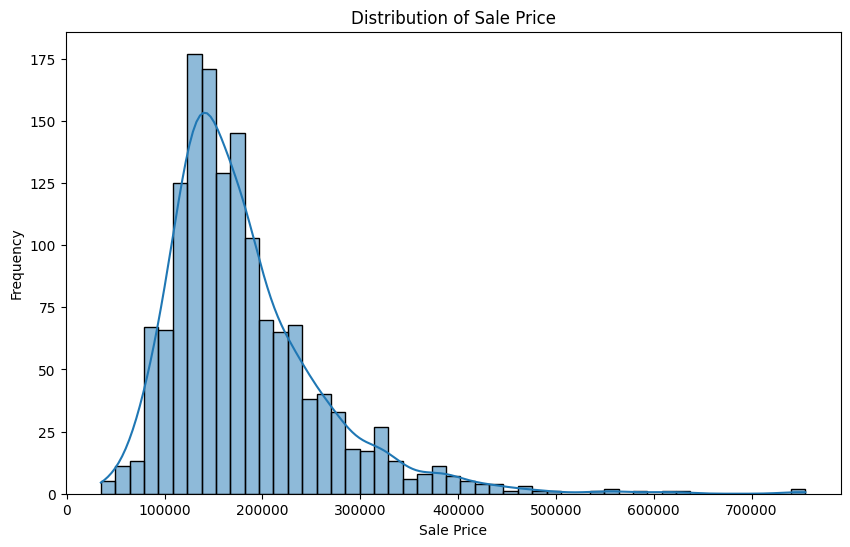

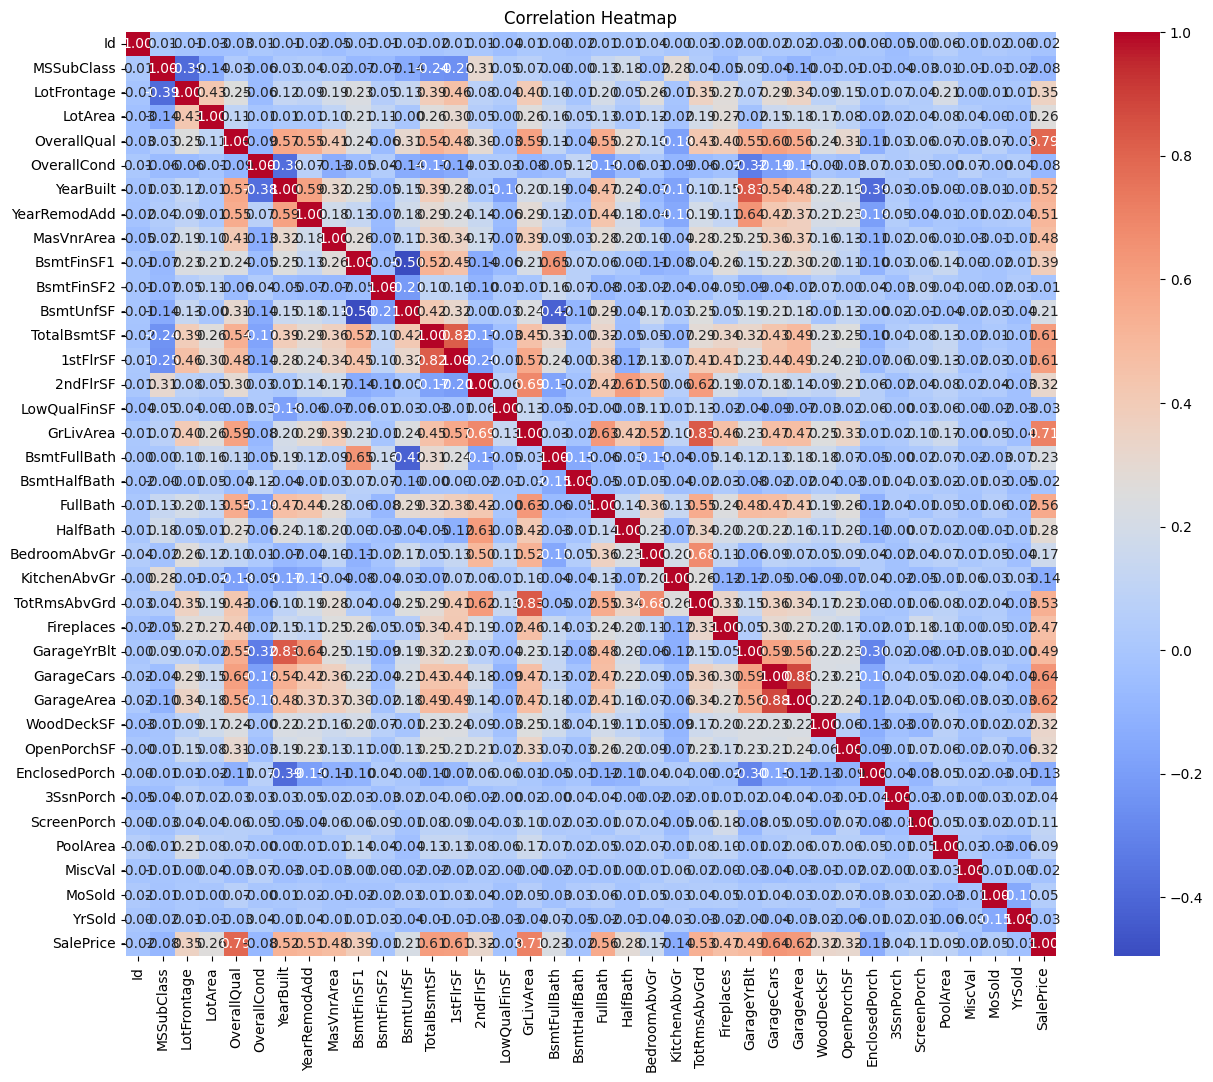

Mean Squared Error (MSE): 1561292634.1663737
Mean Absolute Error (MAE): 24949.937063976013
Root Mean Squared Error (RMSE): 39513.19569670838


In [7]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Read the data description file
with open('data_description.txt', 'r') as file:
    data_description = file.readlines()

# Explore the data
print(train_data.head())
print(train_data.info())
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

# Explore the distribution of the target variable (house price)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Explore correlation between numerical features and target variable
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
corr_matrix = train_data[numeric_columns].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Handle missing values
# For numerical features, fill missing values with mean or median
numeric_columns = numeric_columns.drop('SalePrice')  # Remove 'SalePrice' from numeric columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# For categorical features, fill missing values with the most frequent value
categorical_columns = train_data.select_dtypes(exclude=[np.number]).columns
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])
test_data[categorical_columns] = test_data[categorical_columns].fillna(test_data[categorical_columns].mode().iloc[0])

# Convert categorical variables into numerical representations (if necessary)

# Feature Selection
# Based on correlation analysis, domain knowledge, and feature importance, select a subset of features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

# Split Data
X = train_data[selected_features]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the regression model
# Use appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)



# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [2]:
# Write your code here
!pip install transformers
!pip install tensorflow

import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load BERT model for sentiment analysis
sentiment_classifier = pipeline("sentiment-analysis", model="bert-base-uncased")

# Data collected in Assignment 3
dataset = pd.read_csv('movie_reviews_cleaned.csv')

# Ground truth labels
ground_truths = dataset["Sentiment"].tolist()

# Batch processing function
def batch_process_reviews(reviews):
    batch_size = 4  # Adjust batch size based on available memory
    predictions = sentiment_classifier(reviews)

    return predictions

# Convert reviews to list of strings
reviews = dataset["Cleaned Text"].tolist()

# Predicted sentiments using BERT with batch processing
predicted_sentiments = batch_process_reviews(reviews)

# Extract predicted labels
predicted_labels = [pred['label'] for pred in predicted_sentiments]

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truths, predicted_labels)
precision = precision_score(ground_truths, predicted_labels, average='weighted')
recall = recall_score(ground_truths, predicted_labels, average='weighted')
f1 = f1_score(ground_truths, predicted_labels, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



'''
Description of the selected PLM (BERT):
- BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained language model developed by Google. It is trained on a large corpus of text data using the masked language modeling (MLM) and next sentence prediction (NSP) objectives.
- BERT is based on the Transformer architecture and consists of 12 or 24 transformer layers depending on the variant (BERT-base or BERT-large).
- The original pretraining data sources for BERT include the BooksCorpus (800M words) and English Wikipedia (2,500M words).
- BERT has around 110 million parameters for the base version and around 340 million parameters for the large version.
- For sentiment analysis, we are using BERT in the zero-shot setting, meaning it is applied directly to the task without any task-specific fine-tuning.

**Advantages of BERT:**
- BERT has achieved state-of-the-art performance on various NLP tasks, including sentiment analysis.
- It can capture complex linguistic patterns and contextual information effectively.
- BERT can handle tasks in a zero-shot or few-shot manner, making it versatile for different applications.

**Disadvantages of BERT:**
- BERT can be computationally expensive and memory-intensive, especially for large models and datasets.
- Fine-tuning BERT for specific tasks may require substantial computational resources and labeled data.
- BERT's performance may degrade on out-of-domain or domain-specific tasks compared to task-specific models.

**Challenges encountered during implementation:**
- Batch processing large volumes of text data with BERT can be time-consuming due to computational constraints.
- Optimizing hyperparameters such as batch size, sequence length, and inference strategy is crucial for efficient and accurate sentiment analysis.
- Handling long sequences or documents may require additional preprocessing steps or techniques like sequence truncation or chunking.
- Evaluating BERT's performance on real-world datasets may reveal challenges related to domain adaptation, data imbalance, and noise in the annotations.'''

  Using cached transformers-4.40.0-py3-none-any.whl (9.0 MB)
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
module 'tensorflow._api.v2.compat.v2.__internal__' has no attribute 'register_load_context_function'